# Land use survey Buenos Aires, Argentina 2017

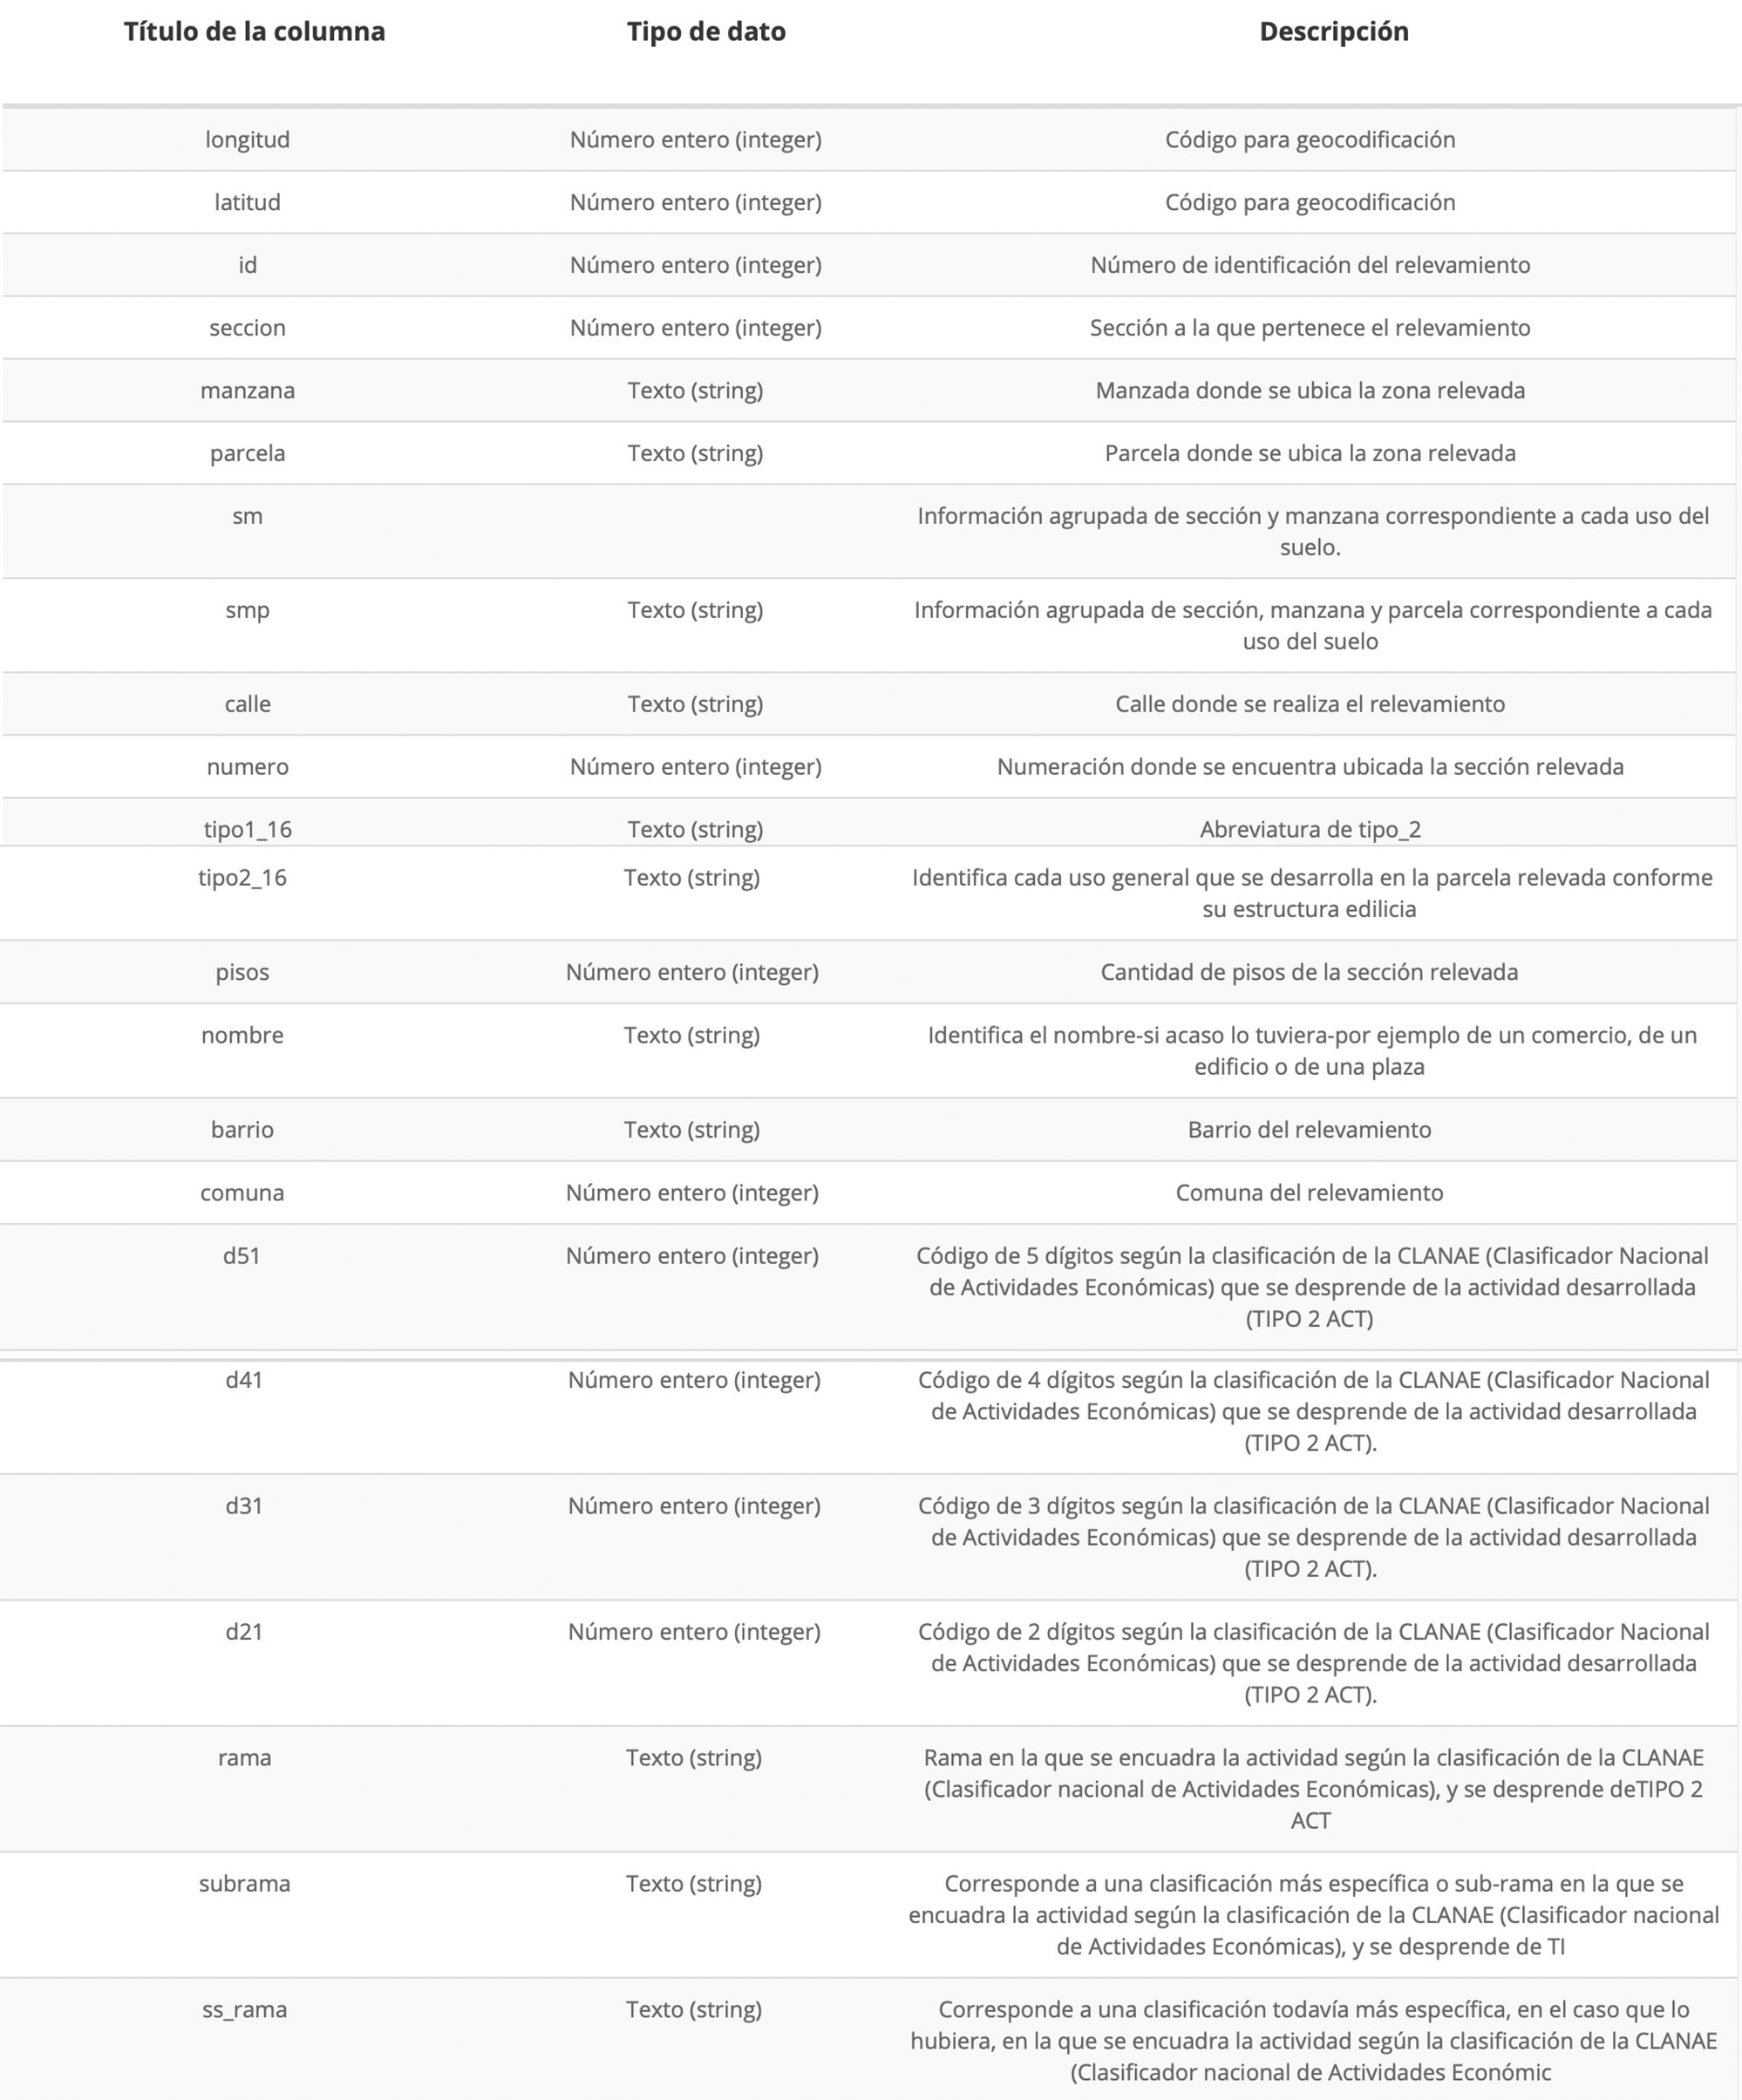

In [3]:
from IPython.display import Image
Image(filename='/.../43.png')

In [4]:
# Importo librerías
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as plt
import geopandas as gpd
import os
import csv

In [5]:
directorio='/.../Documents/GitHub/Relevamiento_Suelo_2017/'

os.chdir('/.../Documents/GitHub/Relevamiento_Suelo_2017/')

df =pd.read_csv(r'relevamiento-usos-del-suelo-2017.csv') 
# Formato de la tabla
#df.style.set_properties(**{'background-color': 'beige',
#                        'color': 'blue',
#                        'border-color': 'black',
#                        'border-width': '1px',
#                        'border-style': 'solid'})

# Visualizo las primeras 10 filas dentro del data set y subrayo los nan con celeste
#df.head(10).style.highlight_null(null_color= 'lightblue')

In [6]:
print('Number of rows and columns:',df.shape)

Number of rows and columns: (561722, 19)


In [7]:
print('Column names:',df.columns)

Column names: Index(['X', 'Y', 'SMP', 'CALLE', 'NUM', 'TIPO1_16', 'TIPO2_16', 'PISOS_16',
       'NOMBRE', 'OBSERVACIO', 'BARRIO', 'COMUNA', '5_DIG', '4_DIG', '3_DIG',
       '2_DIG', 'RAMA', 'SUBRAMA', 'SSRAMA'],
      dtype='object')


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561722 entries, 0 to 561721
Data columns (total 19 columns):
X             561722 non-null float64
Y             561722 non-null float64
SMP           561722 non-null object
CALLE         561722 non-null object
NUM           561722 non-null int64
TIPO1_16      561722 non-null object
TIPO2_16      561722 non-null object
PISOS_16      561722 non-null int64
NOMBRE        23057 non-null object
OBSERVACIO    19071 non-null object
BARRIO        561722 non-null object
COMUNA        561722 non-null float64
5_DIG         561722 non-null int64
4_DIG         561722 non-null int64
3_DIG         561722 non-null int64
2_DIG         561722 non-null int64
RAMA          561721 non-null object
SUBRAMA       560938 non-null object
SSRAMA        225463 non-null object
dtypes: float64(3), int64(6), object(10)
memory usage: 81.4+ MB


## NaNs
Missing data

In [9]:
# Verifico si hay valores nulos
df.isnull().values.any()

True

Null value quantity

In [10]:
# Cantidad valores nulos
df.isnull().sum().sum()

1418360

# Selecciono información a utilizar

Selecciono la columna de Barrio dentro de la Ciudad de Buenos Aires. La cual no muestra datos incompletos


In [11]:
print(df["BARRIO"].unique())

['CHACARITA' 'PATERNAL' 'VILLA CRESPO' 'VILLA DEL PARQUE' 'ALMAGRO'
 'CABALLITO' 'VILLA SANTA RITA' 'MONTE CASTRO' 'VILLA REAL' 'FLORES'
 'FLORESTA' 'CONSTITUCION' 'SAN CRISTOBAL' 'BOEDO' 'VELEZ SARSFIELD'
 'VILLA LURO' 'PARQUE PATRICIOS' 'MATADEROS' 'VILLA LUGANO' 'SAN TELMO'
 'SAAVEDRA' 'COGHLAN' 'VILLA URQUIZA' 'COLEGIALES' 'BALVANERA'
 'VILLA GRAL. MITRE' 'PARQUE CHAS' 'AGRONOMIA' 'VILLA ORTUZAR' 'BARRACAS'
 'PARQUE AVELLANEDA' 'PARQUE CHACABUCO' 'NUEVA POMPEYA' 'PALERMO'
 'VILLA RIACHUELO' 'VILLA SOLDATI' 'VILLA PUEYRREDON' 'VILLA DEVOTO'
 'LINIERS' 'VERSALLES' 'PUERTO MADERO' 'MONTSERRAT' 'SAN NICOLAS'
 'BELGRANO' 'RECOLETA' 'RETIRO' 'NUÑEZ' 'BOCA']


Porcentaje de datos por Barrio

In [17]:
df['BARRIO'].value_counts(normalize=True) * 100

PALERMO              5.240137
FLORES               4.779767
MATADEROS            4.476236
CABALLITO            4.427635
VILLA DEVOTO         4.174307
VILLA URQUIZA        3.977768
BALVANERA            3.324954
VILLA LUGANO         3.175414
BELGRANO             3.114174
LINIERS              3.008072
PARQUE CHACABUCO     2.712018
SAAVEDRA             2.704363
ALMAGRO              2.647751
VILLA CRESPO         2.626210
NUEVA POMPEYA        2.618199
VILLA DEL PARQUE     2.487173
PARQUE AVELLANEDA    2.480052
RECOLETA             2.444448
VILLA PUEYRREDON     2.166552
BARRACAS             2.164238
MONTE CASTRO         2.068283
FLORESTA             2.044962
BOEDO                1.897736
VELEZ SARSFIELD      1.744991
NUÑEZ                1.727545
SAN NICOLAS          1.726299
VILLA LURO           1.723094
VILLA SANTA RITA     1.709208
PARQUE PATRICIOS     1.464960
VILLA GRAL. MITRE    1.454456
COLEGIALES           1.367224
SAN CRISTOBAL        1.330907
VILLA SOLDATI        1.175849
VILLA ORTU

Cantidad de datos recolectados por Barrio

In [12]:
df.BARRIO.value_counts()

PALERMO              29435
FLORES               26849
MATADEROS            25144
CABALLITO            24871
VILLA DEVOTO         23448
VILLA URQUIZA        22344
BALVANERA            18677
VILLA LUGANO         17837
BELGRANO             17493
LINIERS              16897
PARQUE CHACABUCO     15234
SAAVEDRA             15191
ALMAGRO              14873
VILLA CRESPO         14752
NUEVA POMPEYA        14707
VILLA DEL PARQUE     13971
PARQUE AVELLANEDA    13931
RECOLETA             13731
VILLA PUEYRREDON     12170
BARRACAS             12157
MONTE CASTRO         11618
FLORESTA             11487
BOEDO                10660
VELEZ SARSFIELD       9802
NUÑEZ                 9704
SAN NICOLAS           9697
VILLA LURO            9679
VILLA SANTA RITA      9601
PARQUE PATRICIOS      8229
VILLA GRAL. MITRE     8170
COLEGIALES            7680
SAN CRISTOBAL         7476
VILLA SOLDATI         6605
VILLA ORTUZAR         6520
PARQUE CHAS           6366
MONTSERRAT            6326
CONSTITUCION          6299
C

Identificamos los usos de las parcelas por barrio

In [13]:
df['TIPO2_16'].unique()

array(['VIVIENDA', 'METALURGIA', 'CASA', 'GARAGE PRIVADO', 'OFICINAS',
       'UNIFICADO EDIFICIO', 'ALARMAS PARA AUTOMOTORES (VENTA)',
       'REPUESTOS AUTOMOTOR (VENTA)', 'DEPOSITO', 'LOCAL CERRADO',
       'AIRE ACONDICIONADO AUTOMOTORES (COLOCACION Y VENT*',
       'LUBRICENTRO', 'TALLER DE SUSPENSION AUTOMOTORES',
       'ACCESORIOS AUTOMOTOR', 'VU - VIVIENDA UNICA', 'RESTAURANTE - BAR',
       'TALLER MECANICO DE AUTOMOTORES', 'USO UNICO', 'MAXIKIOSCO',
       'FERRETERIA', 'KIOSCO', 'ABANDONADO', 'CERRADO',
       'EDIFICIO PRODUCTIVO', 'IMPRENTA', 'VIAS TREN', 'EDU', 'FLORES',
       'IGLESIA', 'CENTRO DE JUBILADOS', 'ASOCIACION CIVIL', 'GALPON',
       'LETREROS LUMINOSOS', 'LOTE', 'UNIFICADO LOTE',
       'ALMACEN + VERDULERIA', 'FABRICACION DE ART. DE ILUMINACION',
       'MARMOLES', 'CONFITERIA Y PANADERIA (ELABORACION)',
       'VENTA DE METALES', 'LABORATORIO DE ANALISIS BIOQUIMICOS',
       'FABRICA DE MUEBLES MADERA', 'YOGA', 'SUPERMERCADO',
       'FLORES Y PLANTAS', 

En este caso, nos enfocamos en el uso de parcelas para vivienda por barrio:

In [14]:
viviendas = df.loc[:, 'TIPO2_16'] == 'VIVIENDA'
df_viviendas = df.loc[viviendas]
df_viviendas['TIPO2_16'].count()

149060

Barrio del Retiro:

In [15]:
viviendas_RETIRO = df_viviendas.loc[:, 'BARRIO'] == 'RETIRO'
df_viviendas_RETIRO = df_viviendas.loc[viviendas_RETIRO]
df_viviendas_RETIRO['BARRIO'].count()

666

# Gráfico viviendas por barrio

Visualizamos en un gráfico de barras la cantidad de espacios destinados a viviendas por barrio y observamos que
el barrio con mayor porcentaje de parcelas destinadas a vivienda es Palermo

In [6]:
# Cantidad de viviendas en barrios
Viviendas_barrio = df_viviendas[df_viviendas.TIPO2_16.str.contains('VIVIENDA|BARRIO')]


Text(0, 0.5, 'Barrio')

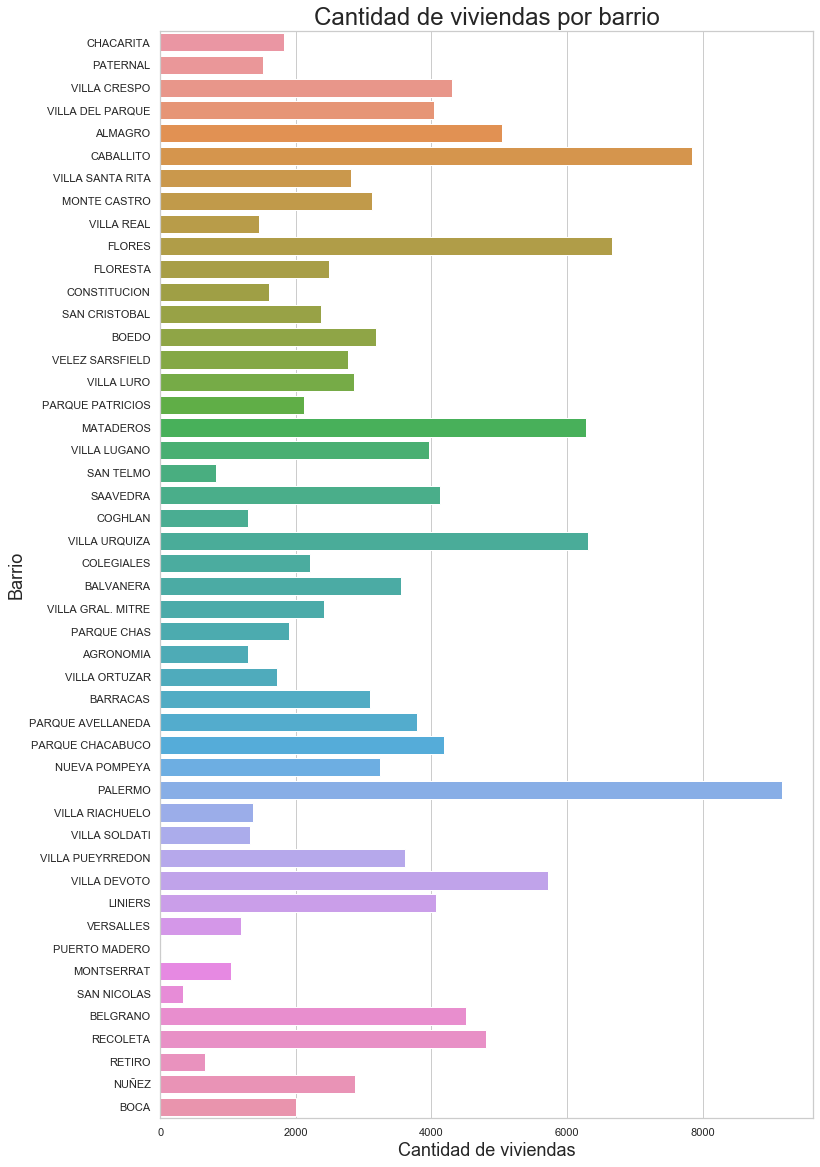

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

labels = ['CHACARITA', 'PATERNAL', 'VILLA CRESPO', 'VILLA DEL PARQUE',
       'ALMAGRO', 'CABALLITO', 'VILLA SANTA RITA', 'MONTE CASTRO',
       'VILLA REAL', 'FLORES', 'FLORESTA', 'CONSTITUCION',
       'SAN CRISTOBAL', 'BOEDO', 'VELEZ SARSFIELD', 'VILLA LURO',
       'PARQUE PATRICIOS', 'MATADEROS', 'VILLA LUGANO', 'SAN TELMO',
       'SAAVEDRA', 'COGHLAN', 'VILLA URQUIZA', 'COLEGIALES', 'BALVANERA',
       'VILLA GRAL. MITRE', 'PARQUE CHAS', 'AGRONOMIA', 'VILLA ORTUZAR',
       'BARRACAS', 'PARQUE AVELLANEDA', 'PARQUE CHACABUCO',
       'NUEVA POMPEYA', 'PALERMO', 'VILLA RIACHUELO', 'VILLA SOLDATI',
       'VILLA PUEYRREDON', 'VILLA DEVOTO', 'LINIERS', 'VERSALLES',
       'PUERTO MADERO', 'MONTSERRAT', 'SAN NICOLAS', 'BELGRANO',
       'RECOLETA', 'RETIRO', 'NUÑEZ', 'BOCA']

sns.set(style="whitegrid",rc={'figure.figsize':(11.7,20)}, color_codes=True)
# Grafico de barras
sns.countplot(y=Viviendas_barrio['BARRIO'])
plt.title('Cantidad de viviendas por barrio',fontsize=24)
plt.xlabel('Cantidad de viviendas',fontsize=18)
plt.ylabel("Barrio", fontsize= 18)


### Algunas estadisticas:
    Cantidad suelo utilizado para viviendas: 149060 en total de todos los barrios
    Cantidad de barrios: 48
    Barrio con mayor % de suelo utilizado para vivienda: Palermo
    Palermo: 9170

In [257]:
Viviendas_barrio['BARRIO'].describe()

count      149060
unique         48
top       PALERMO
freq         9170
Name: BARRIO, dtype: object

# Data Set barrios Ciudad de Buenos Aires

Utilizamos las coordenadas Poligonales para poder crear un mapa de la Ciudad de Buenos Aires

In [8]:
Barrios = '/Users/gonzalosaravia/Documents/GitHub/Relevamiento_Suelo_2017/barrios.geojson.txt' 
mapa_barrios = gpd.read_file('/Users/gonzalosaravia/Documents/GitHub/Relevamiento_Suelo_2017/barrios.geojson.txt')
mapa_barrios.head()

,barrio,comuna,perimetro,area,geometry
0,CHACARITA,15,7724.852955,3.115707e+06,"POLYGON ((-58.45282 -34.59599, -58.45366 -34.5..."
1,PATERNAL,15,7087.513295,2.229829e+06,"POLYGON ((-58.46558 -34.59656, -58.46562 -34.5..."
2,VILLA CRESPO,15,8131.857075,3.615978e+06,"POLYGON ((-58.42375 -34.59783, -58.42495 -34.5..."
3,VILLA DEL PARQUE,11,7705.389797,3.399596e+06,"POLYGON ((-58.49461 -34.61487, -58.49479 -34.6..."
4,ALMAGRO,5,8537.901368,4.050752e+06,"POLYGON ((-58.41287 -34.61412, -58.41282 -34.6..."


# Gráfico Ciudad Autónoma de Buenos Aires por barrio

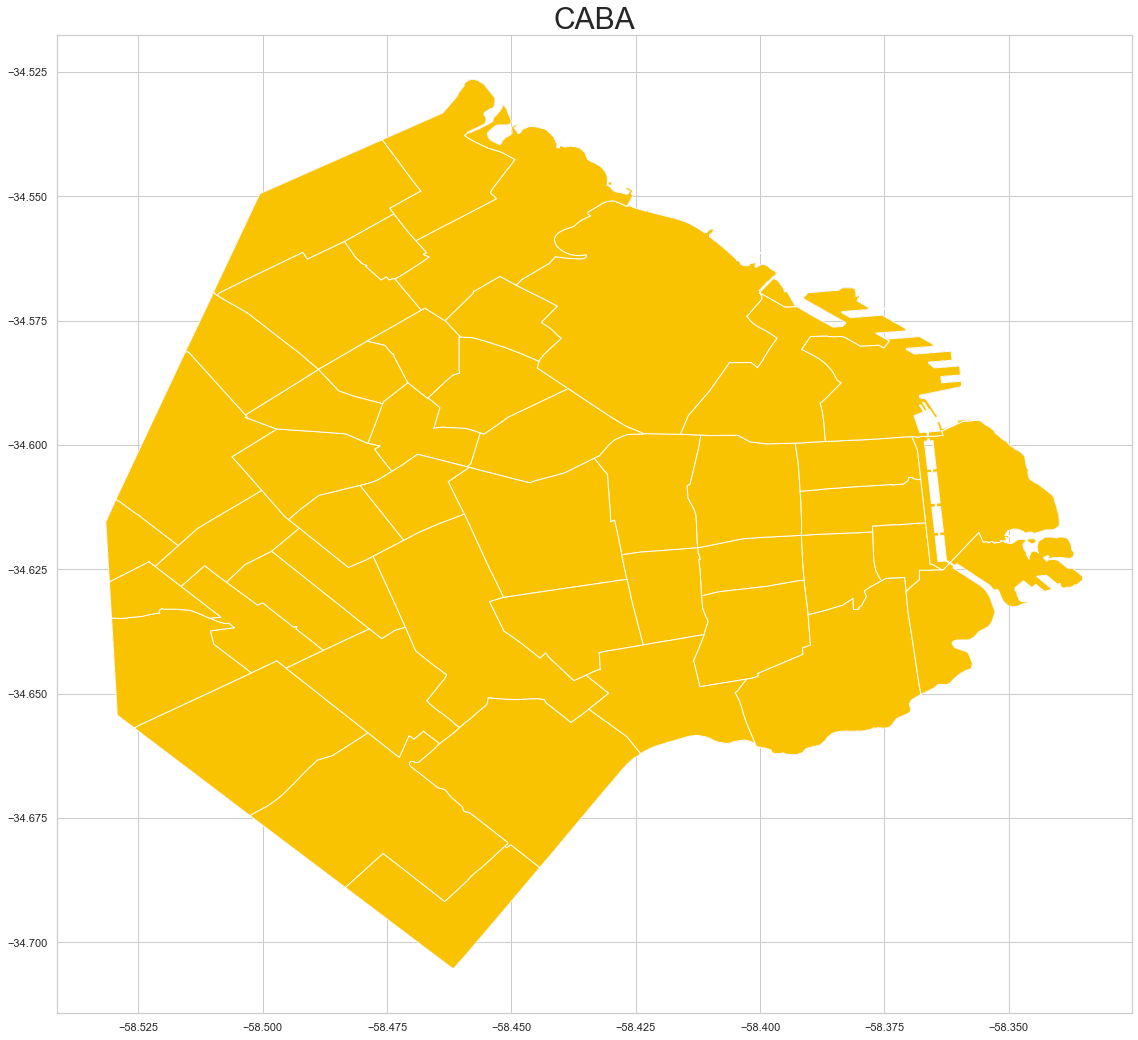

In [9]:
figsize = (20, 18)
mapa = mapa_barrios['geometry'].plot(color="#011f4b", linewidth = 0.03, figsize = figsize)

mapa.set_title('CABA',
               fontdict={'fontsize':'30',
                         'fontweight':'7'})



# Agrego los limites de las provincias
mapa_barrios.plot(ax=mapa, color="#F9C301", markersize=0.15)

In [10]:
df_viviendas= df_viviendas.groupby(['BARRIO']).size().reset_index(name= 'Viviendas_por_barrio')

In [11]:
# Uno ambos datasets y borro el duplicado
Df_v = pd.merge(mapa_barrios, df_viviendas, left_on='barrio', right_on='BARRIO')

Df_v.drop(['BARRIO'], axis=1)

,barrio,comuna,perimetro,area,geometry,Viviendas_por_barrio
0,CHACARITA,15,7724.852955,3.115707e+06,"POLYGON ((-58.45282 -34.59599, -58.45366 -34.5...",1821
1,PATERNAL,15,7087.513295,2.229829e+06,"POLYGON ((-58.46558 -34.59656, -58.46562 -34.5...",1521
2,VILLA CRESPO,15,8131.857075,3.615978e+06,"POLYGON ((-58.42375 -34.59783, -58.42495 -34.5...",4310
3,VILLA DEL PARQUE,11,7705.389797,3.399596e+06,"POLYGON ((-58.49461 -34.61487, -58.49479 -34.6...",4043
4,ALMAGRO,5,8537.901368,4.050752e+06,"POLYGON ((-58.41287 -34.61412, -58.41282 -34.6...",5046
5,CABALLITO,6,10990.964471,6.851029e+06,"POLYGON ((-58.43061 -34.60705, -58.43056 -34.6...",7846
6,VILLA SANTA RITA,11,5757.752335,2.153691e+06,"POLYGON ((-58.48192 -34.62429, -58.48274 -34.6...",2809
7,MONTE CASTRO,10,7361.036418,2.627481e+06,"POLYGON ((-58.50349 -34.62403, -58.50467 -34.6...",3126
8,VILLA REAL,10,5070.965652,1.334146e+06,"POLYGON ((-58.52512 -34.61400, -58.52511 -34.6...",1465
9,FLORES,7,15772.439510,8.590784e+06,"POLYGON ((-58.46041 -34.65680, -58.46090 -34.6...",6658


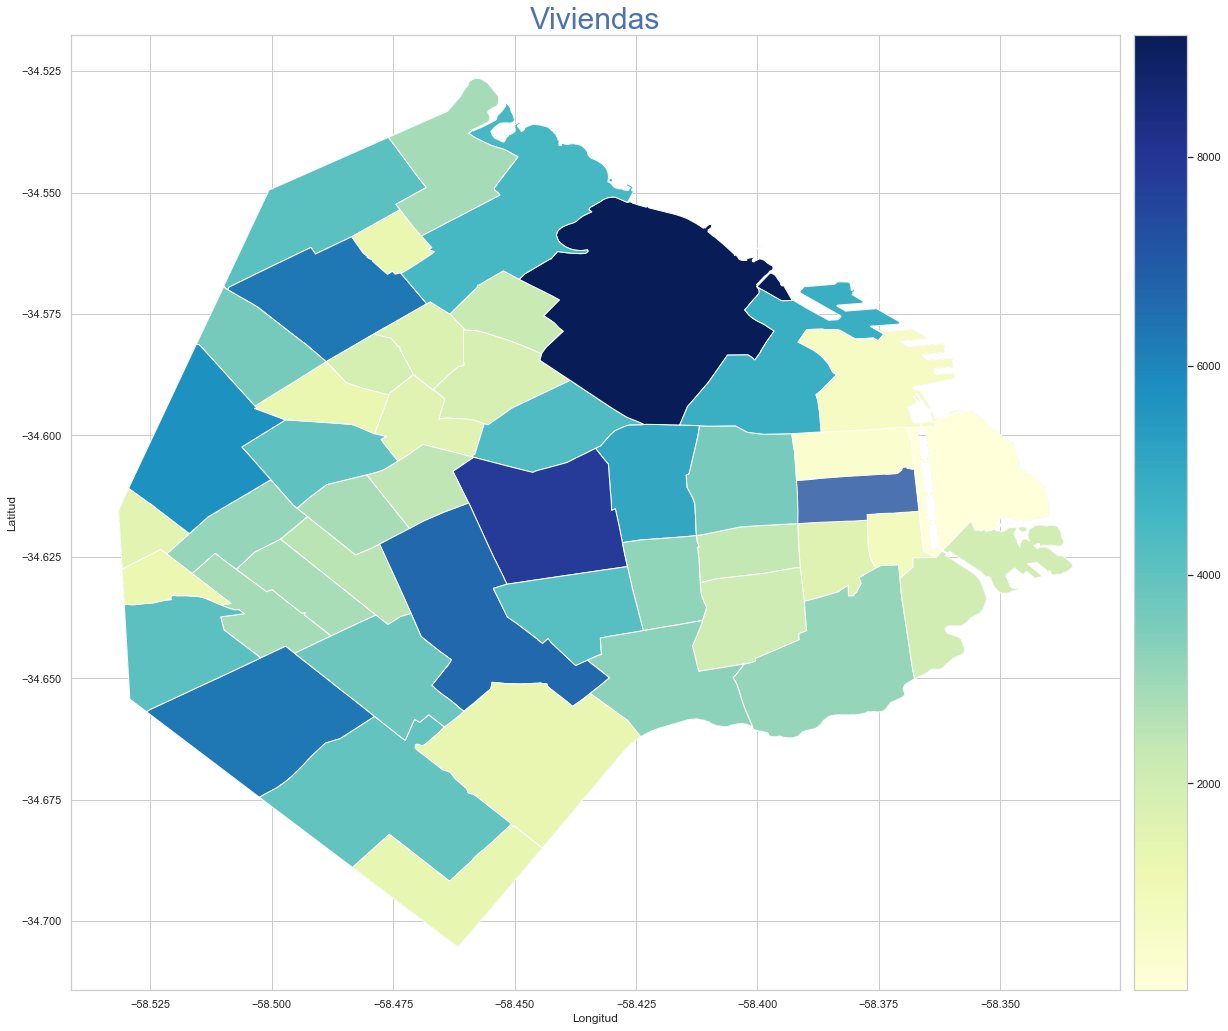

In [266]:
figsize = (20, 18)
mapa = mapa_barrios['geometry'].plot(linewidth = 0.03, figsize = figsize)

mapa.set_title('Viviendas',
               fontdict={'fontsize':'30',
                         'fontweight':'7',
                         'color': 'b'})
mapa.set_xlabel('Longitud')
mapa.set_ylabel('Latitud')

from mpl_toolkits.axes_grid1 import make_axes_locatable

divider = make_axes_locatable(mapa)
cax = divider.append_axes("right", size="5%", pad=0.2)

#Df_v.plot(column='Viviendas_por_barrio', cmap='viridis', ax=mapa, zorder=5, markersize=0.15)
Df_v.plot(column='Viviendas_por_barrio', cmap='YlGnBu', ax=mapa,
              legend=True, cax=cax, zorder=5)



## Para analizar la información segmentamos por barrio

### Barrio del Retiro

In [28]:
Retiro = mapa_barrios[ mapa_barrios['barrio'] == 'RETIRO' ]

## Gráfico Barrio del Retiro

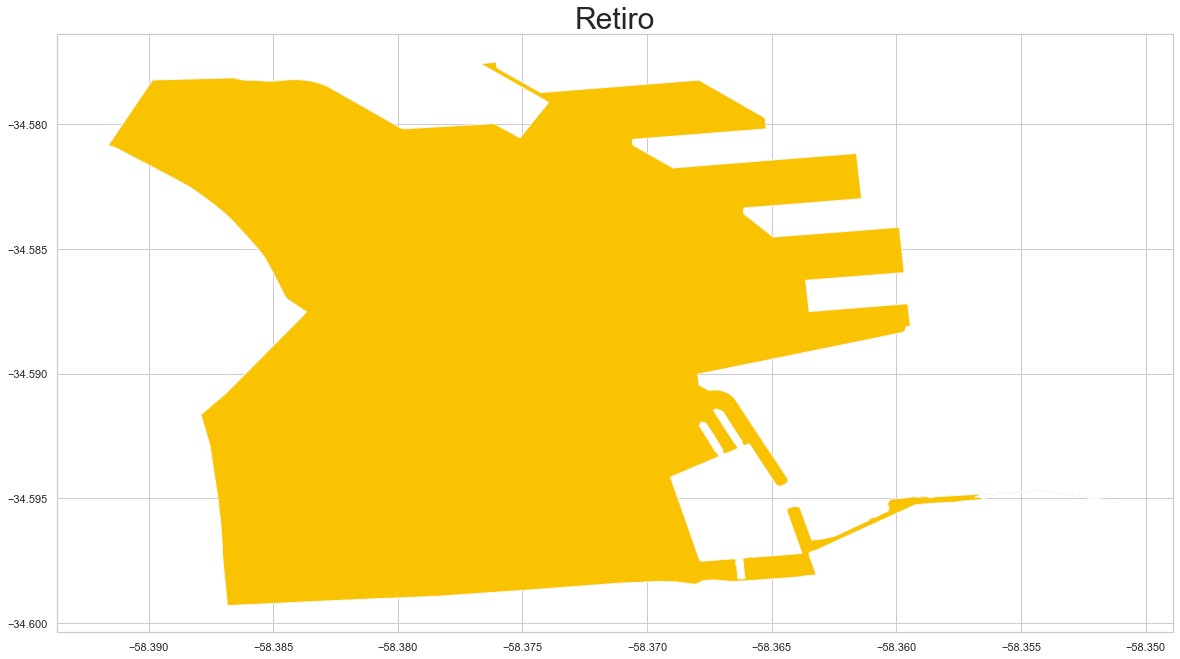

In [29]:
# MAPA Retiro
figsize = (20, 18)

mapa = Retiro['geometry'].plot(color="#011f4b", linewidth = 0.03, figsize = figsize)

mapa.set_title('Retiro',
               fontdict={'fontsize':30,
                        'fontweight': 7})

# Agrego los limites de las provincias
Retiro.plot(ax=mapa, color="#F9C301", markersize=0.15)

# Mapa por parcelas de la ciudad de Buenos Aires

### Para poder generar una mejor visualización del mapa también haremos uso del data set de parcelas

In [30]:
Parcelas = '/.../Documents/GitHub/Relevamiento_Suelo_2017/parcelas.geojson.txt' 
mapa_parcelas = gpd.read_file('/.../Documents/GitHub/Relevamiento_Suelo_2017/parcelas.geojson.txt')
mapa_parcelas.head()

,FeatId1,MANZANA,OBS,PARCELA,SECCION,SMP,BARRIOS,COMUNA,AREA,PERIMETER,ACRES,DIST_M2,HECTARES,PARTIDA,SUP_EDIF,UNIDADES,geometry
0,0,132A,INFORMACION CONSISTENTE,034a,061,061-132A-034a,AGRONOMIA,15,2122760.91,6564.499,524.544,0.11,212.276,0,None,None,"POLYGON Z ((-58.48494 -34.58907 0.00000, -58.4..."
1,4096,134,INFORMACION CONSISTENTE,021,061,061-134-021,AGRONOMIA,15,2122760.91,6564.499,524.544,0.11,212.276,302518,129,2,"POLYGON Z ((-58.48803 -34.59079 0.00000, -58.4..."
2,4093,134,INFORMACION CONSISTENTE,010,061,061-134-010,AGRONOMIA,15,2122760.91,6564.499,524.544,0.11,212.276,247898,234,2,"POLYGON Z ((-58.48877 -34.59076 0.00000, -58.4..."
3,4091,134,INFORMACION CONSISTENTE,017,061,061-134-017,AGRONOMIA,15,2122760.91,6564.499,524.544,0.11,212.276,247912,246,0,"POLYGON Z ((-58.48839 -34.59078 0.00000, -58.4..."
4,4086,134,INFORMACION CONSISTENTE,016,061,061-134-016,AGRONOMIA,15,2122760.91,6564.499,524.544,0.11,212.276,247913,271,0,"POLYGON Z ((-58.48847 -34.59083 0.00000, -58.4..."


### Asigno a Retiro las parcelas

In [31]:
Retiro_parcelas = mapa_parcelas.loc[:, 'BARRIOS'] == 'RETIRO'
df_Retiro_parcelas = mapa_parcelas.loc[Retiro_parcelas]
df_Retiro_parcelas['BARRIOS'].count()

1615

In [32]:
Viviendas_retiro = df_viviendas[df_viviendas.TIPO2_16.str.contains('VIVIENDA|BARRIO')]

## Gráfico parcelas dentro de Retiro

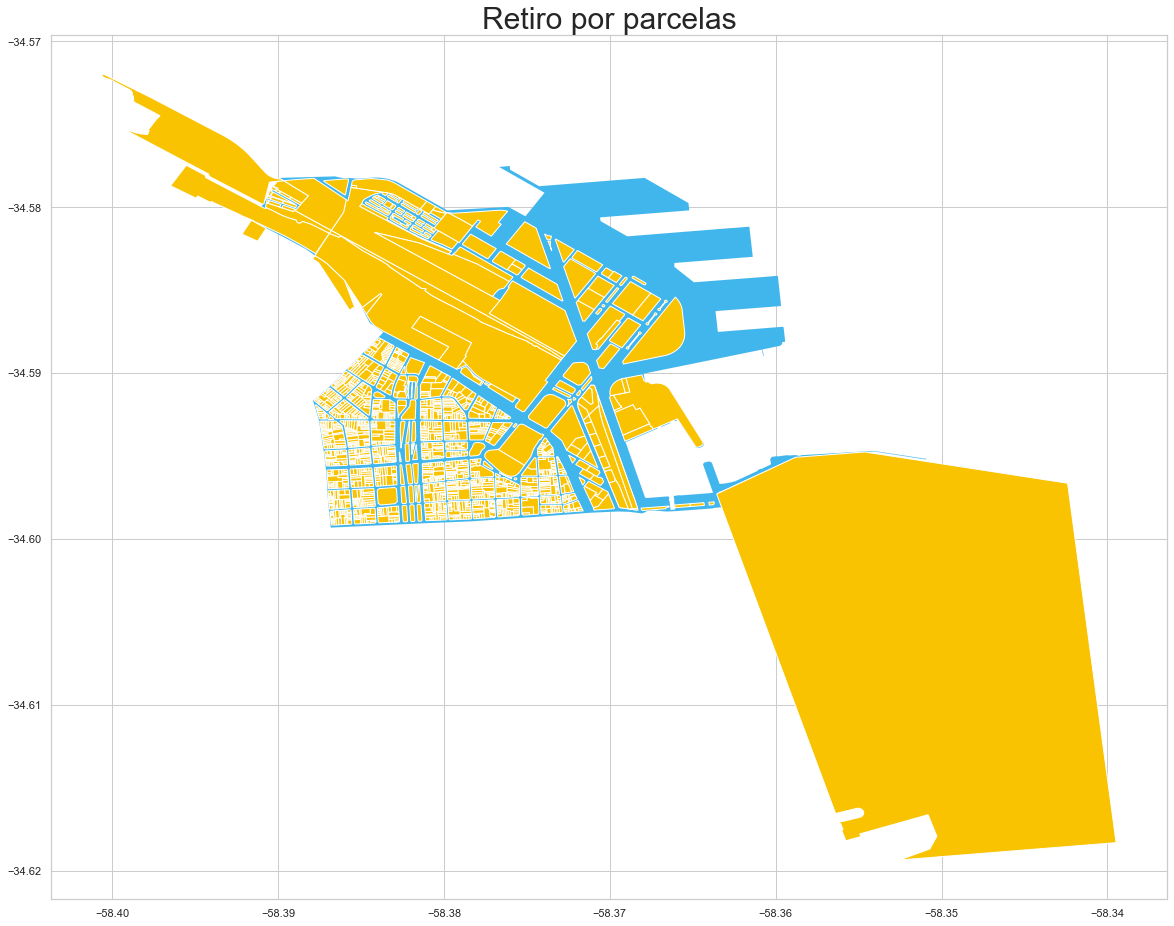

In [33]:
figsize = (20, 18)

mapa = Retiro['geometry'].plot(color="#40B6EC", linewidth = 0.03, figsize = figsize)

mapa.set_title('Retiro por parcelas',
               fontdict={'fontsize':30,
                        'fontweight': 7})

# Agrego los limites de las provincias
df_Retiro_parcelas.plot(ax=mapa, color="#F9C301", markersize=0.15)


### Transformo las coordenadas X e Y del data set principal a geometry

Este paso es necesario para poder generar un solo grafico e insertar la información en forma de puntos y eleminó 
las columnas

In [48]:
import geopandas
gdf_barrios = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.X, df.Y))
gdf_barrios.head()

,X,Y,SMP,CALLE,NUM,TIPO1_16,TIPO2_16,PISOS_16,NOMBRE,OBSERVACIO,BARRIO,COMUNA,5_DIG,4_DIG,3_DIG,2_DIG,RAMA,SUBRAMA,SSRAMA,geometry
0,-58.455634,-34.596891,047-040A-001C,MONTENEGRO,124,E,VIVIENDA,1,NaN,NaN,CHACARITA,15.0,3,0,0,0,EDIFICIOS,VIVIENDA,NaN,POINT (-58.45563 -34.59689)
1,-58.455699,-34.596945,047-040A-002,NUEVA ZELANDIA,4820,EP,METALURGIA,1,RODOCA S.A.,NaN,CHACARITA,15.0,28900,2890,289,28,"FABRICACIÓN DE PRODUCTOS ELABORADOS DE METAL, ...",FABRICACIÓN DE PRODUCTOS ELABORADOS DE METAL NCP,NaN,POINT (-58.45570 -34.59694)
2,-58.455750,-34.597013,047-040A-003,NUEVA ZELANDIA,4830,E,CASA,1,NaN,E X GAP,CHACARITA,15.0,4,0,0,0,EDIFICIOS,CASA,NaN,POINT (-58.45575 -34.59701)
3,-58.455810,-34.597074,047-040A-004,NUEVA ZELANDIA,4840,GAP,GARAGE PRIVADO,1,NaN,NaN,CHACARITA,15.0,63312,6331,633,63,SERVICIOS COMPLEMENTARIOS AL TRANSPORTE,SERVICIOS COMPLEMENTARIOS AL TRANSPORTE TERRESTRE,"ESTACIONAMIENTOS, COCHERAS Y GARAJES",POINT (-58.45581 -34.59707)
4,-58.455879,-34.597129,047-040A-005,NUEVA ZELANDIA,4850,GAP,GARAGE PRIVADO,1,NaN,NaN,CHACARITA,15.0,63312,6331,633,63,SERVICIOS COMPLEMENTARIOS AL TRANSPORTE,SERVICIOS COMPLEMENTARIOS AL TRANSPORTE TERRESTRE,"ESTACIONAMIENTOS, COCHERAS Y GARAJES",POINT (-58.45588 -34.59713)


In [89]:
# Elimino las columnas x e y
gdf_barrios.drop(['X', 'Y'], axis=1)

,SMP,CALLE,NUM,TIPO1_16,TIPO2_16,PISOS_16,NOMBRE,OBSERVACIO,BARRIO,COMUNA,5_DIG,4_DIG,3_DIG,2_DIG,RAMA,SUBRAMA,SSRAMA,geometry
0,047-040A-001C,MONTENEGRO,124,E,VIVIENDA,1,NaN,NaN,CHACARITA,15.0,3,0,0,0,EDIFICIOS,VIVIENDA,NaN,POINT (-58.45563 -34.59689)
1,047-040A-002,NUEVA ZELANDIA,4820,EP,METALURGIA,1,RODOCA S.A.,NaN,CHACARITA,15.0,28900,2890,289,28,"FABRICACIÓN DE PRODUCTOS ELABORADOS DE METAL, ...",FABRICACIÓN DE PRODUCTOS ELABORADOS DE METAL NCP,NaN,POINT (-58.45570 -34.59694)
2,047-040A-003,NUEVA ZELANDIA,4830,E,CASA,1,NaN,E X GAP,CHACARITA,15.0,4,0,0,0,EDIFICIOS,CASA,NaN,POINT (-58.45575 -34.59701)
3,047-040A-004,NUEVA ZELANDIA,4840,GAP,GARAGE PRIVADO,1,NaN,NaN,CHACARITA,15.0,63312,6331,633,63,SERVICIOS COMPLEMENTARIOS AL TRANSPORTE,SERVICIOS COMPLEMENTARIOS AL TRANSPORTE TERRESTRE,"ESTACIONAMIENTOS, COCHERAS Y GARAJES",POINT (-58.45581 -34.59707)
4,047-040A-005,NUEVA ZELANDIA,4850,GAP,GARAGE PRIVADO,1,NaN,NaN,CHACARITA,15.0,63312,6331,633,63,SERVICIOS COMPLEMENTARIOS AL TRANSPORTE,SERVICIOS COMPLEMENTARIOS AL TRANSPORTE TERRESTRE,"ESTACIONAMIENTOS, COCHERAS Y GARAJES",POINT (-58.45588 -34.59713)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561717,064-099K-010,SIN NOMBRE OFICIAL,3338,LOTE,OTROS,0,NaN,ESPACIO COMPARTIDO POR VIVIENDAS,VILLA LUGANO,8.0,29,0,0,0,OTROS,OTROS,NaN,POINT (-58.46890 -34.65971)
561718,064-099K-012,SIN NOMBRE OFICIAL,3346,LOTE,OTROS,0,NaN,ESPACIO COMPARTIDO POR VIVIENDAS,VILLA LUGANO,8.0,29,0,0,0,OTROS,OTROS,NaN,POINT (-58.46902 -34.65962)
561719,064-099K-001,SIN NOMBRE OFICIAL,4402,LOTE,OTROS,0,NaN,ESPACIO COMPARTIDO POR VIVIENDAS,VILLA LUGANO,8.0,29,0,0,0,OTROS,OTROS,NaN,POINT (-58.46911 -34.65955)
561720,064-099K-002,SIN NOMBRE OFICIAL,4406,LOTE,OTROS,0,NaN,ESPACIO COMPARTIDO POR VIVIENDAS,VILLA LUGANO,8.0,29,0,0,0,OTROS,OTROS,NaN,POINT (-58.46917 -34.65966)


In [ ]:
### Cantidad de datos recolectados del uso de suelo en el barrio de Retiro: 4789

In [90]:
Retiro_puntos = gdf_barrios.loc[:, 'BARRIO'] == 'RETIRO'
df_Retiro_puntos = gdf_barrios.loc[Retiro_puntos]
df_Retiro_puntos['BARRIO'].count()

4789

### Cantidad de datos recolectados del uso de suelo destinado a viviendas en el barrio del Retiro: 666

In [182]:
Retiro_puntos_vivienda = df_Retiro_puntos.loc[:, 'TIPO2_16'] == 'VIVIENDA'
df_Retiro_puntos_vivienda = df_Retiro_puntos.loc[Retiro_puntos_vivienda]
df_Retiro_puntos_vivienda['BARRIO'].count()

666

Los datos de viviendas en el barrio del Retiro representa el 13.90687% del total

In [183]:
Retiro_puntos_vivienda.value_counts(normalize=True) * 100

False    86.09313
True     13.90687
Name: TIPO2_16, dtype: float64

### Cantidad de datos recolectados del uso de suelo destinado a oficinas en el barrio del Retiro: 187

In [184]:
Retiro_puntos_oficinas = df_Retiro_puntos.loc[:, 'TIPO2_16'] == 'OFICINAS'
df_Retiro_puntos_oficinas = df_Retiro_puntos.loc[Retiro_puntos_oficinas]
df_Retiro_puntos_oficinas['BARRIO'].count()

187

## Gráfico distribución de viviendas en el barrio Retiro

[(-34.6, -34.57), (-58.4, -58.35)]

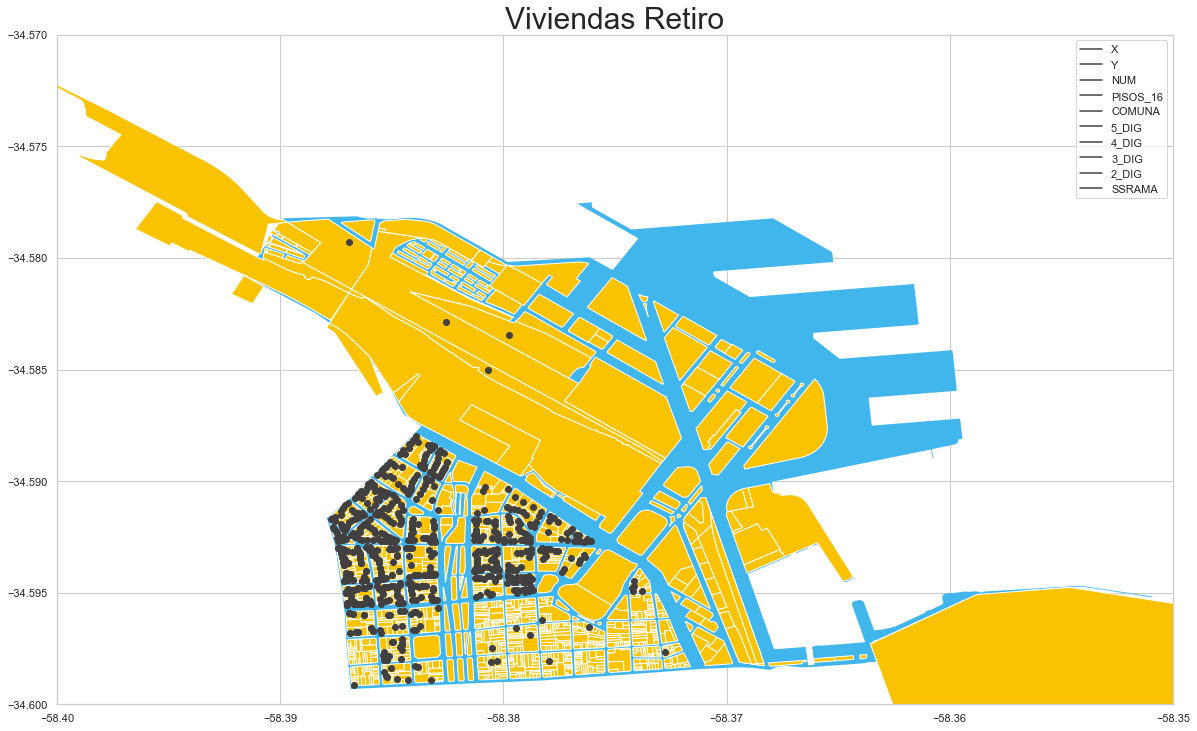

In [186]:
figsize = (20, 18)

mapa = Retiro['geometry'].plot(color="#40B6EC", linewidth = 0.03, figsize = figsize)

mapa.set_title('Viviendas Retiro',
               fontdict={'fontsize':30,
                        'fontweight': 7})

# Agrego los limites de las provincias
df_Retiro_parcelas.plot(ax=mapa, color="#F9C301", markersize=0.15)
df_viviendas_RETIRO.plot(ax=mapa, color="#413F40")
# Viviendas
df_Retiro_puntos_vivienda.plot(ax=mapa, color="#413F40")
# Oficinas
#df_Retiro_puntos_oficinas.plot(ax=mapa, color='r')

mapa.set(xlim=(-58.40, -58.35), ylim=(-34.60, -34.57))

Podemos observar en el gráfico que hay una gran concentración de uso de suelo destinado a viviendas entre las
Avenidas Santa Fe y Av. Del Libertador y la calle Talcahuano y hasta llegar a la Plaza San Martín.
De completar los datos con otros valores de en el uso del suelo, seguramente nos podremos encontrar con que las
parcelas ubicadas cruzando la Av. Santa Fe pueden estar siendo utilizadas mayoritariamente para negocios 
comerciales y oficinas.

## Gráfico distribución de oficinas en el barrio Retiro

[(-34.6, -34.57), (-58.4, -58.35)]

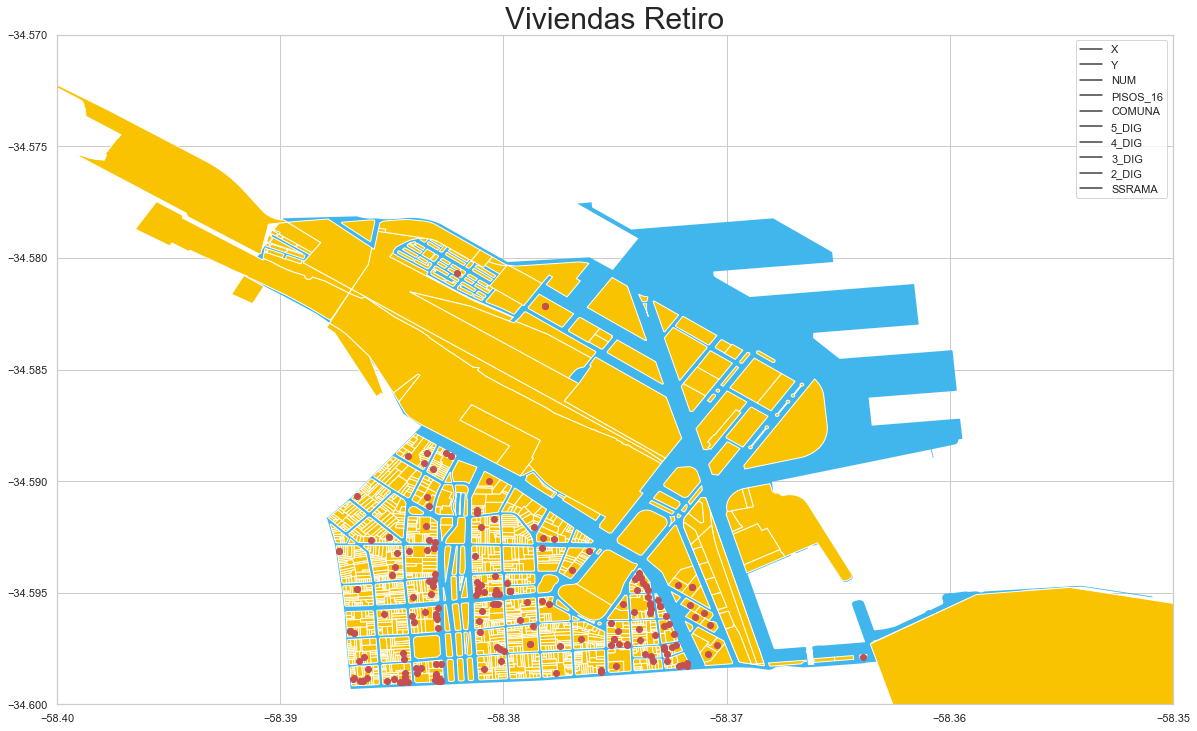

In [260]:
figsize = (20, 18)

mapa = Retiro['geometry'].plot(color="#40B6EC", linewidth = 0.03, figsize = figsize)

mapa.set_title('Viviendas Retiro',
               fontdict={'fontsize':30,
                        'fontweight': 7})

# Agrego los limites de las provincias
df_Retiro_parcelas.plot(ax=mapa, color="#F9C301", markersize=0.15)
df_viviendas_RETIRO.plot(ax=mapa, color="#413F40")
# Oficinas
df_Retiro_puntos_oficinas.plot(ax=mapa, color='r')

mapa.set(xlim=(-58.40, -58.35), ylim=(-34.60, -34.57))

Este trabajo de analisis y visualización podría contener también especificaciones en cada punto sobre los valores preferentes del data set. Por ej. Calle y numeración.